<a href="https://colab.research.google.com/github/luke2134/Assignment-4-Gaussian-Mixture-Models/blob/main/Assignment%204%3A%20Gaussian%20Mixture%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4: Gaussian Mixture Models**

**1. Retrieve and Load the Olivetti Faces Dataset**


In [1]:
from sklearn.datasets import fetch_olivetti_faces

# Fetch the Olivetti Faces dataset, setting shuffle=True to randomize the data, and a fixed random_state for reproducibility
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)

# X will hold the image data
X, y = faces_data.data, faces_data.target

# Display a message
print("Olivetti Faces dataset loaded. Total samples:", X.shape[0])


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Olivetti Faces dataset loaded. Total samples: 400


**2. Split the Dataset using Stratified Sampling**

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)

# Now, split the temporary set into validation (20%) and test (20%) sets, also ensuring stratified sampling
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Print the sizes of the training, validation, and test sets to confirm the splits
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 240
Validation set size: 80
Test set size: 80


**3. Apply PCA to Reduce Dimensionality**

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99, svd_solver='full')
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print("PCA Components:", pca.n_components_)


PCA Components: 178


**4. Determine the Most Suitable Covariance Type**


In [4]:
from sklearn.mixture import GaussianMixture

covariance_types = ['full', 'tied', 'diag', 'spherical']
best_covariance_type = None
best_score = float('inf')

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=40, covariance_type=cov_type, random_state=42)
    gmm.fit(X_train_pca)
    score = gmm.bic(X_val_pca)
    if score < best_score:
        best_score = score
        best_covariance_type = cov_type

print("Best Covariance Type:", best_covariance_type)


Best Covariance Type: spherical


**5. Determine the Minimum Number of Clusters (AIC/BIC)**

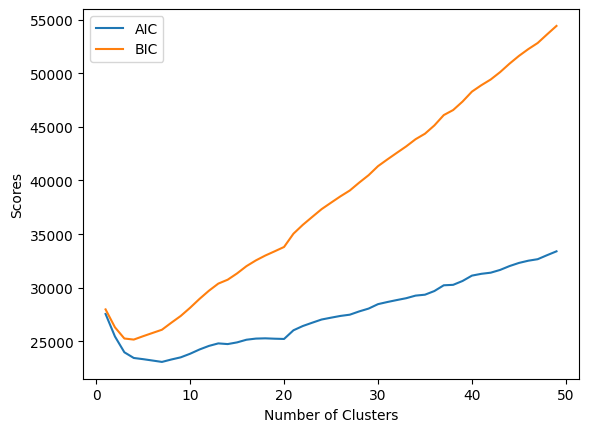

In [5]:
n_clusters_range = range(1, 50)
aic_scores = []
bic_scores = []

for n_clusters in n_clusters_range:
    gmm = GaussianMixture(n_components=n_clusters, covariance_type=best_covariance_type, random_state=42)
    gmm.fit(X_train_pca)
    aic_scores.append(gmm.aic(X_val_pca))
    bic_scores.append(gmm.bic(X_val_pca))

import matplotlib.pyplot as plt

plt.plot(n_clusters_range, aic_scores, label='AIC')
plt.plot(n_clusters_range, bic_scores, label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Scores')
plt.legend()
plt.show()


**6. Output Hard and Soft Clustering Assignments**

In [6]:
# Hard Clustering
hard_labels = gmm.predict(X_test_pca)
print("Hard Clustering Assignments:", hard_labels)

# Soft Clustering
soft_labels = gmm.predict_proba(X_test_pca)
print("Soft Clustering Probabilities:", soft_labels)


Hard Clustering Assignments: [48  1 27 14 45 23  5 22 34 24 21 30  5  4 48  3 22  3  8  6  3 37  6 32
 39 15 34 48 39 26 10  8 21 48 22  2 29 48 18 21 19 40  3 45 48 46 48 36
 16 21 42 24  0 25  4 13 20  3 22 26 19 13 46 36 47 20 11 43  0 46 23 11
 10 37 46 42 40 21 18 47]
Soft Clustering Probabilities: [[1.42284410e-213 1.23418711e-068 0.00000000e+000 ... 9.04886449e-052
  0.00000000e+000 9.99999996e-001]
 [1.39427321e-136 1.00000000e+000 0.00000000e+000 ... 6.80581439e-078
  0.00000000e+000 3.96773411e-045]
 [3.61991548e-173 1.12779934e-108 0.00000000e+000 ... 2.03508114e-056
  0.00000000e+000 1.15435952e-063]
 ...
 [7.54552477e-156 1.43513542e-055 5.77117368e-265 ... 1.65255667e-004
  7.48206760e-284 1.90354575e-060]
 [4.37214617e-118 1.70256459e-204 4.52786978e-214 ... 1.06464018e-172
  1.40391102e-315 2.11948289e-063]
 [1.68163631e-132 0.00000000e+000 2.76487521e-014 ... 4.91804325e-198
  1.00000000e+000 1.87313252e-174]]


**7. Generate New Faces**

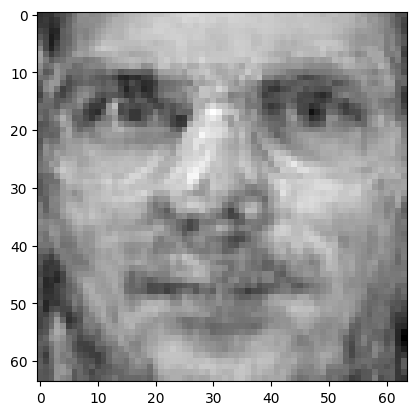

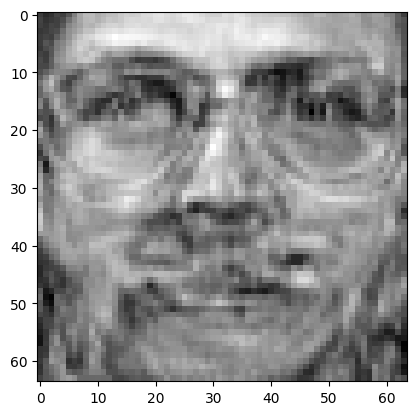

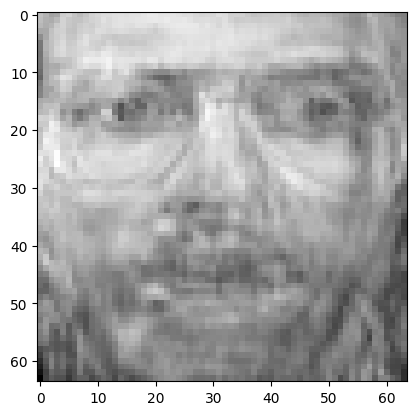

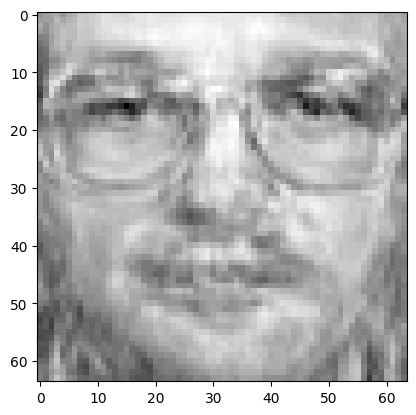

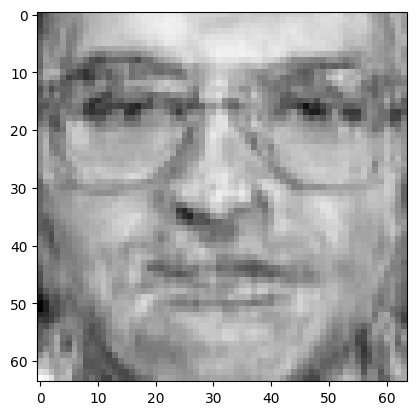

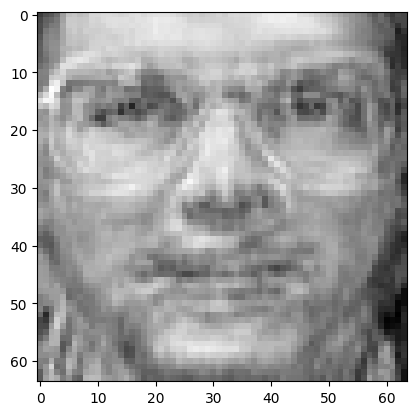

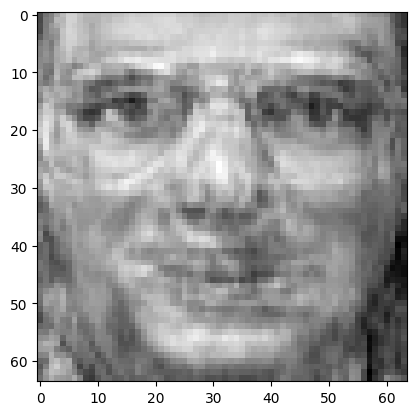

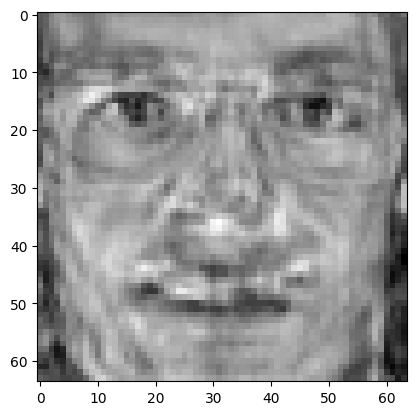

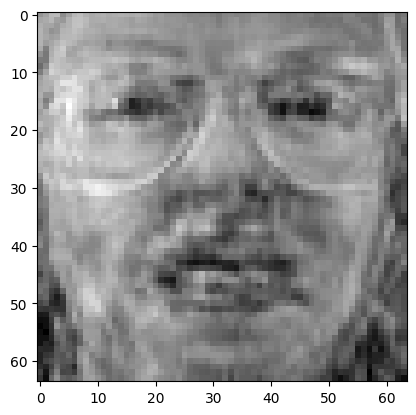

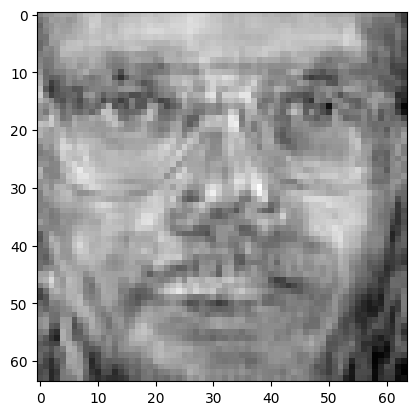

In [7]:
new_faces, _ = gmm.sample(10)  # Generate 10 new samples
new_faces_original_space = pca.inverse_transform(new_faces)

# Visualize the new faces
for face in new_faces_original_space:
    plt.imshow(face.reshape(64, 64), cmap='gray')
    plt.show()


**8. Modify Some Images (Rotate, Flip, Darken)**

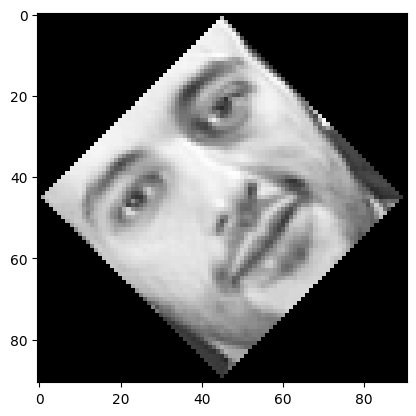

In [8]:
from scipy.ndimage import rotate
import numpy as np

rotated_image = rotate(X_test[0].reshape(64, 64), angle=45)
flipped_image = np.fliplr(X_test[0].reshape(64, 64))  # Horizontal flip
darkened_image = X_test[0].reshape(64, 64) * 0.5  # Reduce brightness by 50%

plt.imshow(rotated_image, cmap='gray')
plt.show()


**9. Detect Anomalies**

In [12]:
from skimage.transform import resize

# Resize the rotated image back to 64x64 pixels
rotated_image_resized = resize(rotated_image, (64, 64), anti_aliasing=True)

# Flatten the resized image and transform it using PCA
anomaly_scores = gmm.score_samples(pca.transform([rotated_image_resized.flatten()]))

print("Normal Score:", normal_scores[0])
print("Anomaly Score:", anomaly_scores)


Normal Score: -171.40103293123144
Anomaly Score: [-1244.84908792]
